# Table of Contents
1. Problem Statement
2. Project Objective
3. Data Description
4. Data Pre-processing
5. Model building
6. Results

# 1. Problem Statement
   A global finance company company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

# 2. Project Objective
   Given a person’s credit-related information, build a machine learning model that can classify the credit score.

# 3. Data Description

The data set contains data related to below mentioned features of an customer.

Month, Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score.

The Feature 'Credit_Score' is the response variable and it takes values as Poor, Standard and Good.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing dataset

In [2]:
df=pd.read_csv('credit_score.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# 4. Data Pre-processing

Removing unnessecary column from dataframe

In [5]:
df=df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'])
df.shape

(100000, 22)

In [6]:
col=df.columns
col

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [7]:
for i in col:
    print(i)
    print(df[i].dtypes)
    print(df[i].unique())
    print('\n')

Month
object
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Age
object
['23' '-500' '28_' ... '4808_' '2263' '1342']


Occupation
object
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Annual_Income
object
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']


Monthly_Inhand_Salary
float64
[1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]


Num_Bank_Accounts
int64
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1

['312.49408867943663' '284.62916249607184' '331.2098628537912' ...
 516.8090832742814 319.1649785257098 393.6736955618808]


Credit_Score
object
['Good' 'Standard' 'Poor']




Replacing the special characters with empty string or with null values according to the data and converting it into int or float datatype.

In [8]:
df['Age']=df['Age'].str.replace('_','')
df['Age']=df['Age'].astype(int)

df['Occupation']=df['Occupation'].replace('_______', np.nan)

df['Annual_Income']=df['Annual_Income'].str.replace('_','')
df['Annual_Income']=df['Annual_Income'].astype(float)

df['Num_of_Loan']=df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)

df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float)

df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)

df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix']=df['Credit_Mix'].replace(['Bad','Standard','Good'], [0,1,2])

df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace('NM','No')
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace(['Yes','No'], [1,0])

df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('_','')
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)

df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8',np.nan)

df['Monthly_Balance']=df['Monthly_Balance'].str.replace('_','')
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)

df['Credit_Score']=df['Credit_Score'].replace(['Poor','Standard','Good'], [0,1,2])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [10]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

# Replacing null values using Forward and backward fill method is used

In [11]:
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')

# Checking for outliers

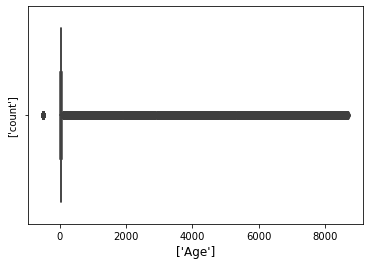

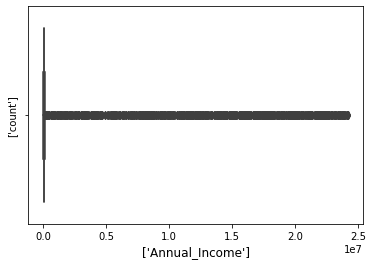

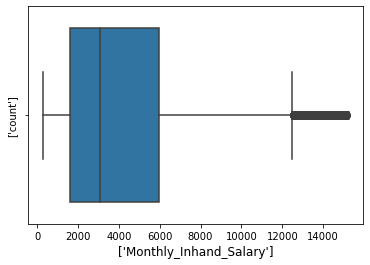

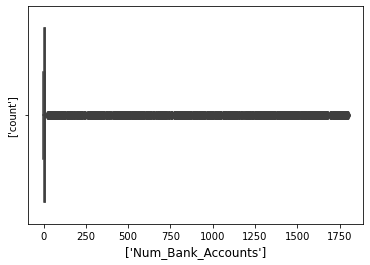

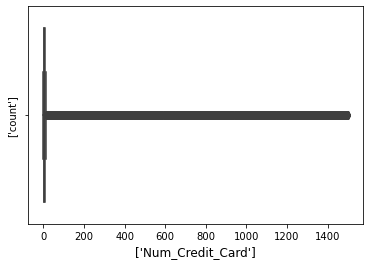

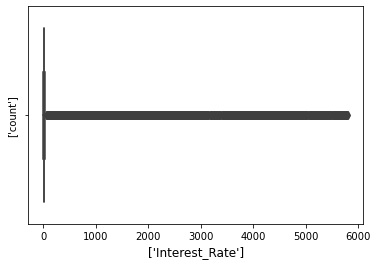

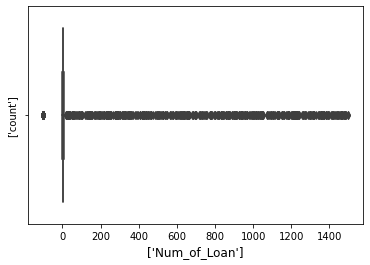

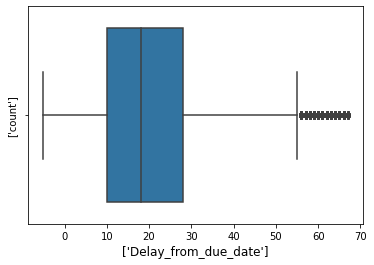

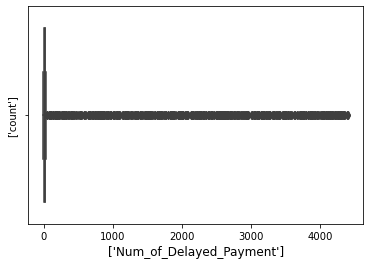

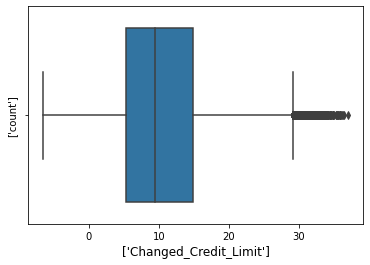

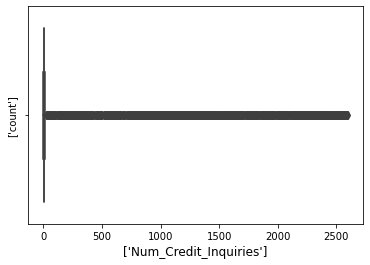

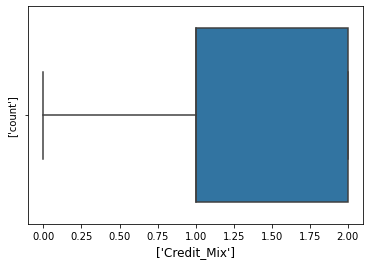

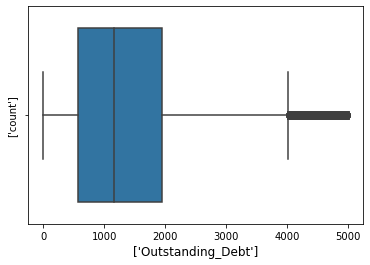

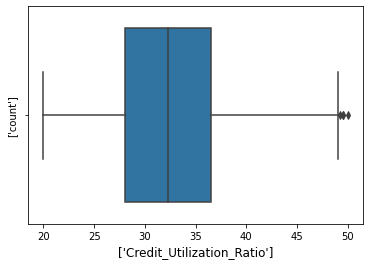

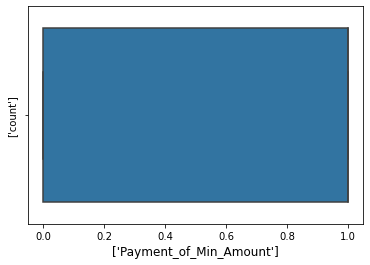

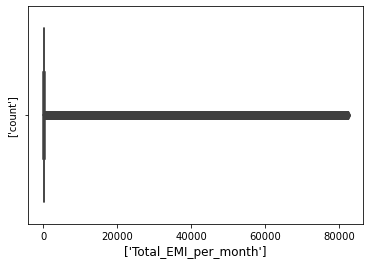

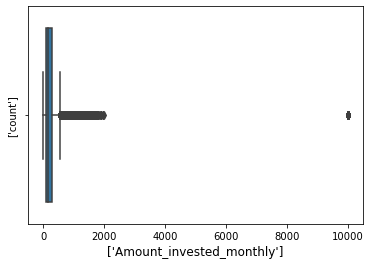

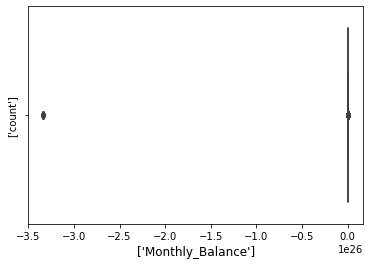

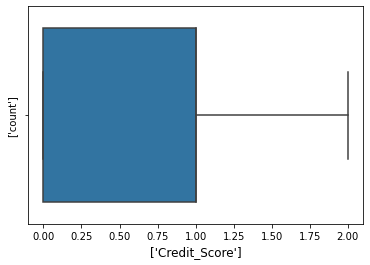

In [12]:
for col_name in col:
  if (df[col_name].dtypes!='object'):
    sns.boxplot(data=df, x=col_name)
    plt.xlabel([col_name],fontsize=12)
    plt.ylabel(['count'])
    warnings.simplefilter(action='ignore')
    plt.show()

In [13]:
# Age column has outliers thus removing them, while other columns kept as it is.
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]

Month_Balance column has negative values, thus removing those values

In [14]:
df=df[df['Monthly_Balance']>0]

# Distribution of Credit score rating 

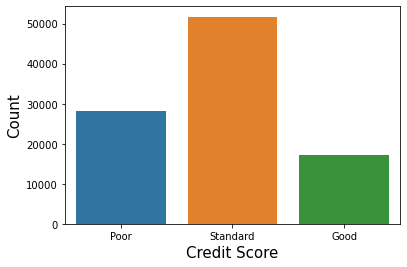

In [15]:
x=[0,1,2]
sns.countplot(data=df ,x='Credit_Score')
plt.xticks(x,['Poor','Standard','Good'])
plt.xlabel('Credit Score',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

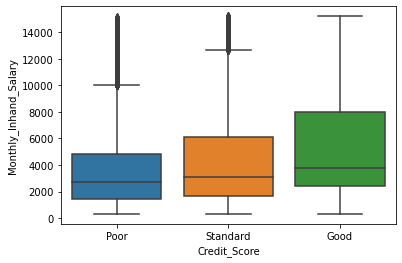

In [16]:
x=[0,1,2]
sns.boxplot(data=df, x='Credit_Score', y='Monthly_Inhand_Salary')
plt.xticks(x,['Poor','Standard','Good'])
plt.show()

It can be noted from above visual that person having more Monthly Inhand Salary have Good credit rating.

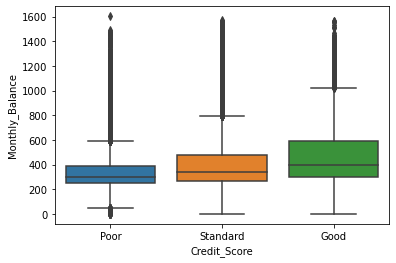

In [17]:
x=[0,1,2]
sns.boxplot(data=df, x='Credit_Score', y='Monthly_Balance')
plt.xticks(x,['Poor','Standard','Good'])
plt.show()

Person having Monthly Account Balance more is having Good credit score.

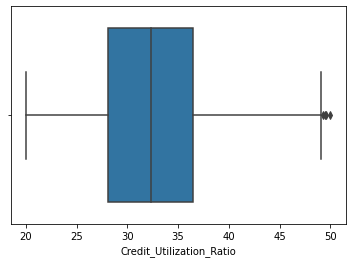

In [18]:
sns.boxplot(data=df, x='Credit_Utilization_Ratio')
plt.show()

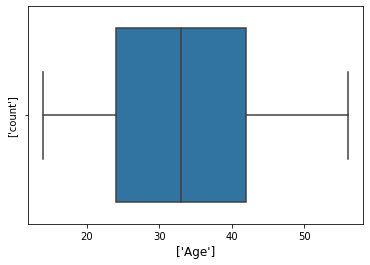

In [19]:
sns.boxplot(data=df, x='Age')
plt.xlabel(['Age'],fontsize=12)
plt.ylabel(['count'])
plt.show()

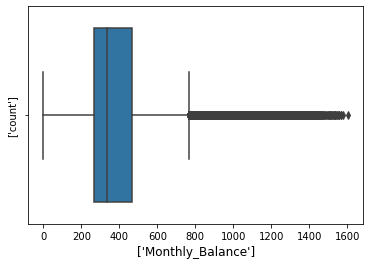

In [20]:
sns.boxplot(data=df, x='Monthly_Balance')
plt.xlabel(['Monthly_Balance'],fontsize=12)
plt.ylabel(['count'])
plt.show()

# Selecting features using VIF (variance_inflation_factor)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for i in df.columns:
    if ((df[i].dtype!='object') & ( i != 'Credit_Score')):
        col_list.append(i)

X=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values, n) for n in range(len(X.columns))]
print(vif_data)

                     feature        VIF
0                        Age   9.747323
1              Annual_Income   1.016331
2      Monthly_Inhand_Salary   5.114131
3          Num_Bank_Accounts   1.021478
4            Num_Credit_Card   1.029992
5              Interest_Rate   1.024115
6                Num_of_Loan   1.003069
7        Delay_from_due_date   5.227533
8     Num_of_Delayed_Payment   1.018965
9       Changed_Credit_Limit   4.571005
10      Num_Credit_Inquiries   1.020793
11                Credit_Mix   7.382917
12          Outstanding_Debt   4.931262
13  Credit_Utilization_Ratio  23.298086
14     Payment_of_Min_Amount   3.549069
15       Total_EMI_per_month   1.028246
16   Amount_invested_monthly   1.103303
17           Monthly_Balance   8.883420


Droping columns having VIF more than 6.

In [22]:
df=df.drop(['Age', 'Credit_Utilization_Ratio', 'Monthly_Balance'], axis=1)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for i in df.columns:
    if ((df[i].dtype!='object') & ( i != 'Credit_Score')):
        col_list.append(i)

X=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values, n) for n in range(len(X.columns))]
print(vif_data)

                    feature       VIF
0             Annual_Income  1.015947
1     Monthly_Inhand_Salary  2.905197
2         Num_Bank_Accounts  1.020912
3           Num_Credit_Card  1.029398
4             Interest_Rate  1.023538
5               Num_of_Loan  1.002937
6       Delay_from_due_date  4.353150
7    Num_of_Delayed_Payment  1.018534
8      Changed_Credit_Limit  4.452433
9      Num_Credit_Inquiries  1.020212
10               Credit_Mix  2.727770
11         Outstanding_Debt  4.500159
12    Payment_of_Min_Amount  3.150958
13      Total_EMI_per_month  1.027659
14  Amount_invested_monthly  1.099410


# Performing Label encoding for categorical columns

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if (df[i].dtypes=='object'):
        df[i]=le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97210 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    97210 non-null  int32  
 1   Occupation               97210 non-null  int32  
 2   Annual_Income            97210 non-null  float64
 3   Monthly_Inhand_Salary    97210 non-null  float64
 4   Num_Bank_Accounts        97210 non-null  int64  
 5   Num_Credit_Card          97210 non-null  int64  
 6   Interest_Rate            97210 non-null  int64  
 7   Num_of_Loan              97210 non-null  int32  
 8   Delay_from_due_date      97210 non-null  int64  
 9   Num_of_Delayed_Payment   97210 non-null  float64
 10  Changed_Credit_Limit     97210 non-null  float64
 11  Num_Credit_Inquiries     97210 non-null  float64
 12  Credit_Mix               97210 non-null  float64
 13  Outstanding_Debt         97210 non-null  float64
 14  Payment_of_Min_Amount 

In [25]:
x=df.drop('Credit_Score', axis=1)
y=df['Credit_Score']

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

# 5. Model building

# Logistic Regression model

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
lr_pred=lr.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [30]:
lr_acc=round((accuracy_score(y_test, lr_pred)),4)*100
lr_acc

62.0

# Decision Tree model

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt_pred=lr.predict(x_test)

In [32]:
dt_acc=round((accuracy_score(y_test, dt_pred)),4)*100
dt_acc

62.0

# Hyperparameter Tuning using RandomSearchCV for Decision Tree

In [33]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

In [34]:
from scipy.stats import randint

In [35]:
param_dist = {"max_depth": [3,5,7,8,9,10,11,12,13,14,15],
              "max_features": randint(1, 12),
              "min_samples_leaf": randint(1, 12),
              "criterion": ["gini", "entropy"]}

In [36]:
tree = DecisionTreeClassifier()

In [37]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [38]:
tree_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013D4D77EEB0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013D4D7893A0>})

In [39]:
print(tree_cv.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 1}


Creating model using best fit parameters

In [40]:
best_tree=DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_features= 10, min_samples_leaf= 4)

In [41]:
best_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features=10, min_samples_leaf=4)

In [42]:
best_pred=best_tree.predict(x_test)

In [43]:
dt_hyper=round((accuracy_score(y_test, best_pred)),4)*100
dt_hyper

70.21

# Random forest model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(x_train, y_train)
rf_pred=lr.predict(x_test)

In [45]:
rf_acc=round((accuracy_score(y_test, rf_pred)),4)*100
rf_acc

62.0

# XGBoost model

In [46]:
from xgboost import XGBClassifier
boost=XGBClassifier(random_state=42)

In [47]:
boost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [48]:
boost_pred=boost.predict(x_test)

In [49]:
xgb_acc=round((accuracy_score(y_test, boost_pred)),4)*100
xgb_acc

73.59

In [54]:
lst = [['Logistic Regression',lr_acc], ['Decision Tree', dt_acc], ['Decision Tree with hyperparameter tuning', dt_hyper], 
       ['Random Forest', rf_acc], ['XGBoost',xgb_acc]]

Accuracy = pd.DataFrame(lst, columns =['Model', 'Accuracy'], dtype = float)
Accuracy['Accuracy']=Accuracy['Accuracy']
Accuracy=Accuracy.style.set_properties(**{'text-align': 'left'})

# 6. Results
   Below are the accuracy obtained from different Ml models.

In [55]:
Accuracy

,Model,Accuracy
0,Logistic Regression,62.000000
1,Decision Tree,62.000000
2,Decision Tree with hyperparameter tuning,70.210000
3,Random Forest,62.000000
4,XGBoost,73.590000
